# Finding outliers using IQR
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than `Q1 - 1.5 x IQR`  or greater than `Q3 - 1.5 x IQR` , it's considered an outlier. In fact, this is how the lengths of the whiskers in a `matplotlib` box plot are calculated.
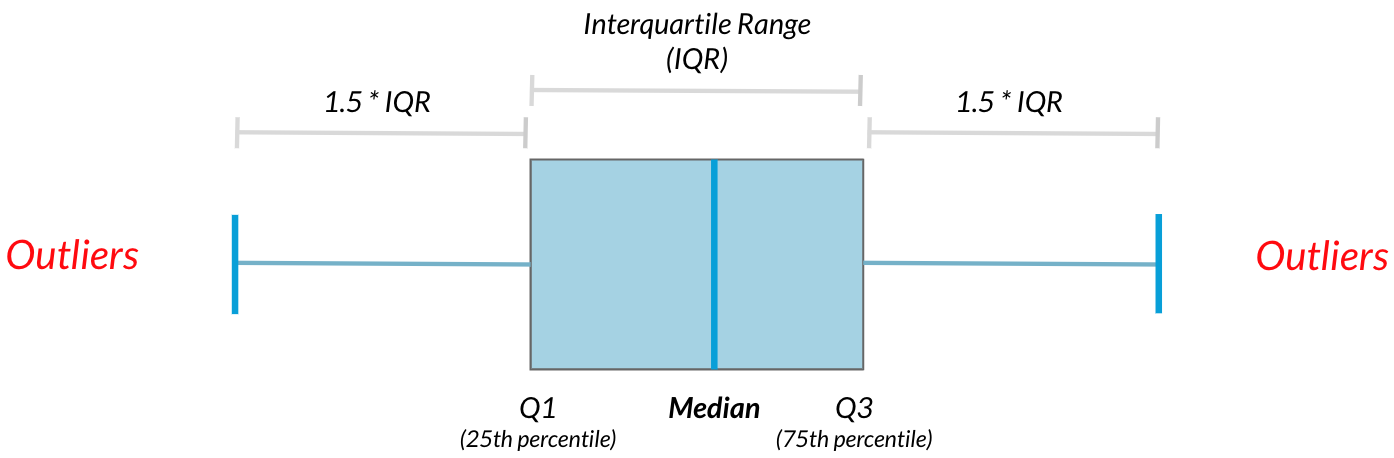

In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and food_consumption is available.

In [1]:
import pandas as pd
import numpy as np
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

food_consumption=pd.read_csv(path+'food_consumption.csv')
print('food_consumption \n',food_consumption.head(),'\n')

food_consumption 
    Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96 



* Calculate the total `co2_emission` per country by grouping by country and taking the sum of `co2_emission`. Store the resulting DataFrame as `emissions_by_country`.

In [2]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


* Compute the first and third quartiles of `emissions_by_country` and store these as `q1` and `q3`.
* Calculate the interquartile range of `emissions_by_country` and store it as `iqr`.

In [5]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = np.quantile(emissions_by_country, 0.75) - np.quantile(emissions_by_country, 0.25) 

print(q1,q3,iqr)

446.66 1111.1525000000001 664.4925000000001


* Calculate the lower and upper cutoffs for outliers of `emissions_by_country`, and store these as `lower` and `upper`.

In [6]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(lower,upper)

-550.0787500000001 2107.89125


* Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [8]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)] 
print(outliers)


country
Argentina    2172.4
Name: co2_emission, dtype: float64
